# Proyek Analisis Data: Bike Sharing
- **Nama:** Hisyam Fadhilah Bahar
- **Email:** m009b4ky1793@bangkit.academy / hisyambahar1103@gmail.com
- **ID Dicoding:** hisyamfadhilb

## Menentukan Pertanyaan Bisnis

- Berapakah banyaknya penyewaan sepeda berdasarkan musim? musim apa yang memiliki kenaikan paling signifikan?
- Berapakah rata-rata dan presentase penyewaan sepeda pada hari libur dibandingkan dengan tidak libur?

## Import Semua Packages/Library yang Digunakan

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membuat dataset day
- Membuat dataset hour

### Assessing Data

In [41]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset day tidak terdapat duplikasi dan missing value
- Pada dataset hour tidak terdapat duplikasi dan missing value

### Cleaning Data

In [55]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [57]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- Pada kolom dteday mengubah dari tipe data "object" menjadi "datetime"

In [59]:
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "workingday" : "workday",
    "weathersit" : "weather",
}, inplace=True)

hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "workingday" : "workday",
    "weathersit" : "weather",
}, inplace=True)

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workday     731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Mengubah nama kolom agar lebih mudah di pahami dengan mengganti nama kolom-kolom yang ada menjadi lebih deskriptif dan mudah dimengerti

In [61]:
day_df['season'] = day_df['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

- Mengubah nilai pada kolom season dalam dataframe day_df dan hour_df menjadi nama-nama musim.

In [63]:
day_df['year']= day_df['year'].replace({0: '2011',1: '2012'})
hour_df['year']= hour_df['year'].replace({0: '2011',1: '2012'})

- Mengubah nilai numerik pada kolom year dalam dataframe day_df dan hour_df dengan format tahun, yaitu 0: Mewakili tahun 2011 dan 1: Mewakili tahun 2012.

**Insight:**
- Pada kolom date mengubah dari tipe data "object" menjadi "datetime"
- Mengubah nama kolom agar lebih mudah di pahami dengan mengganti nama kolom-kolom yang ada menjadi lebih deskriptif dan mudah dimengerti
- Mengubah nilai pada kolom season dalam dataframe day_df dan hour_df menjadi nama-nama musim.
- Mengubah nilai numerik pada kolom year dalam dataframe day_df dan hour_df dengan format tahun, yaitu 0: Mewakili tahun 2011 dan 1: Mewakili tahun 2012.

## Exploratory Data Analysis (EDA)

### Explore ...

In [68]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [70]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


menampilkan baris teratas dari total nilai kolom cnt untuk setiap musim

In [73]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,weekday,cnt
0,5,487790
1,4,485395
2,6,477807
3,3,473048
4,2,469109
5,1,455503
6,0,444027


menampilkan baris teratas hari dalam seminggu dengan total jumlah penyewaan tertinggi hingga terendah.

In [76]:
day_df.groupby(by="weekday").cnt.mean().reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


rata-rata jumlah penyewaan untuk setiap hari dalam seminggu

In [79]:
day_df.groupby(by="workday").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,workday,cnt
0,1,2292410
1,0,1000269


In [81]:
day_df.groupby(by="holiday").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,holiday,cnt
0,0,3214244
1,1,78435


In [83]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur,

**Insight:**
- Musim Fall (musim gugur) menunjukkan jumlah penyewaan tertinggi, yaitu 1.061.129 penyewaan
- Penyewaan sepeda lebih banyak dilakukan pada hari kerja dibandingkan hari libur

## Visualization & Explanatory Analysis

In [88]:
day_df.to_csv('day_cleaned.csv', index=False)

In [90]:
hour_df.to_csv('hour_cleaned.csv', index=False)

### Pertanyaan 1: Berapakah banyaknya penyewaan sepeda berdasarkan musim? musim apa yang memiliki kenaikan paling signifikan?

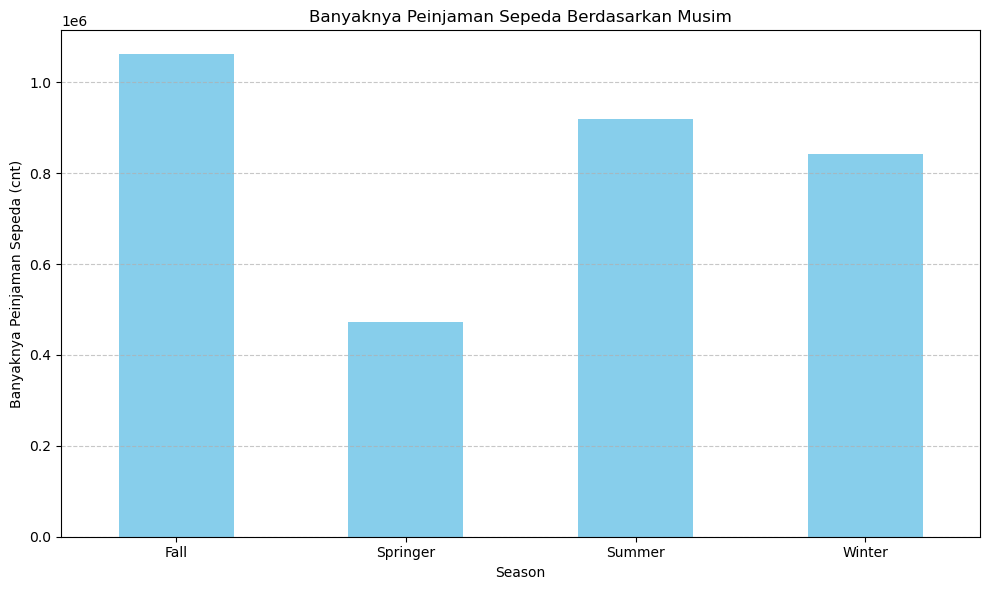

In [93]:
seasons_data = day_df.groupby('season')['cnt'].sum()

plt.figure(figsize=(10, 6))
seasons_data.plot(kind='bar', color='skyblue')

plt.xlabel('Season')
plt.ylabel('Banyaknya Peinjaman Sepeda (cnt)')
plt.title('Banyaknya Peinjaman Sepeda Berdasarkan Musim')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapakah rata-rata dan presentase penyewaan sepeda pada hari libur dibandingkan dengan tidak libur?

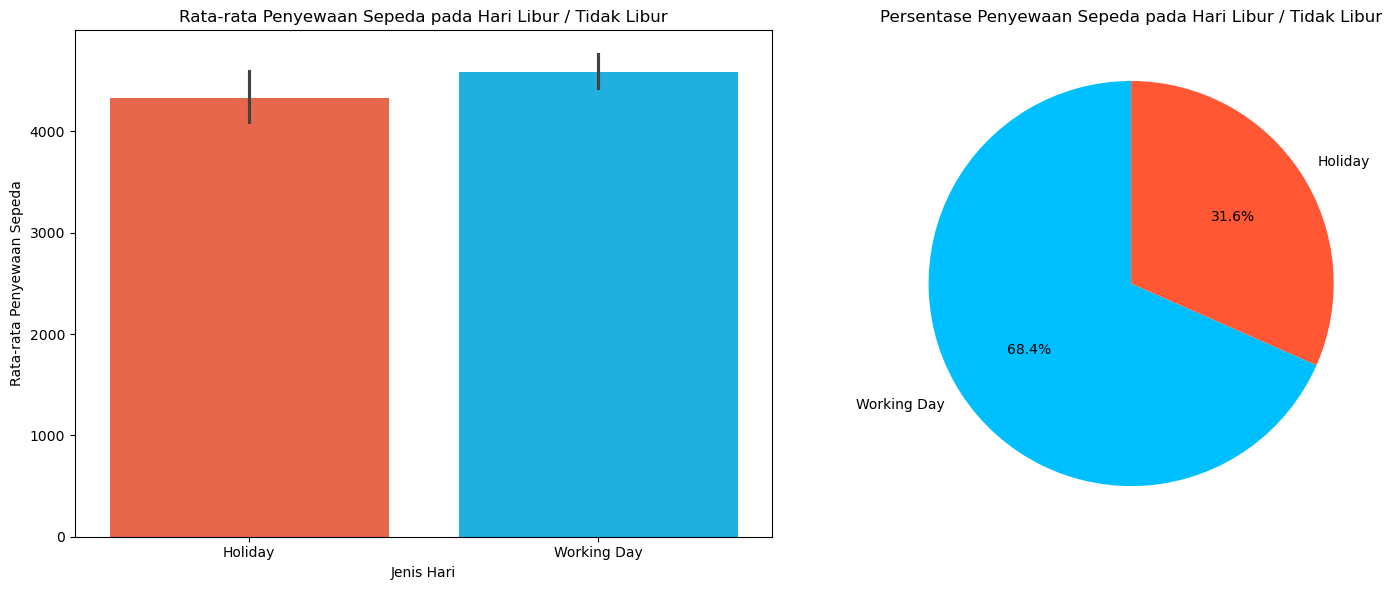

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6)) 

labels = ['Holiday', 'Working Day']  
day_df['workday'] = day_df['workday'].replace({0: 'Holiday', 1: 'Working Day'}) 
colors = ['#FF5733', '#00BFFF']

sns.barplot(x='workday', y='cnt', data=day_df, hue='workday', palette=colors, legend=False, ax=ax[0])
ax[0].set_title('Rata-rata Penyewaan Sepeda pada Hari Libur / Tidak Libur') 
ax[0].set_xlabel('Jenis Hari')
ax[0].set_ylabel('Rata-rata Penyewaan Sepeda') 

data = day_df['workday'].value_counts() 
colors = ['#00BFFF', '#FF5733']

ax[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].set_title('Persentase Penyewaan Sepeda pada Hari Libur / Tidak Libur') 

plt.tight_layout()
plt.show()

**Insight:**
- Menentukan jumlah peminjaman sepeda berdasarkan musim
- Mencari rata-rata dan persentase penyewaan sepeda pada hari libur vs tidak libur

## Conclusion

- Aktivitas penyewaan sepeda tertinggi terjadi pada musim gugur dan pada hari kerja.
- Berdasarkan dari data tersebut, rata-rata penyewaan sepeda cenderung lebih banyak pada hari tidak libur daripada hari libur dan persentase dari total penyewaan sepeda menunjukkan 68,4% untuk penyewaan di hari kerja dan 31,6% di hari libur.